# Lab 10 - Sentiment Analysis - Solution

Based on the sentiment analysis lab notebook and explanation, create a sentiment classifier for IMDB movie reviews.

## Import Libraries and Load the Dataset

In [118]:
# Uncomment the below lines to install the packages if necessary

#!pip install wordcloud
#!pip install nltk --upgrade
#!pip install lxml

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud as wc
import string
import re

import nltk
from nltk import TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup


%matplotlib inline
try:
    df = pd.read_csv('../data/imdb_movie_reviews_subset.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2023/main/data/imdb_movie_reviews_subset.csv')
df.head()

,review,sentiment
0,John Cassavetes is on the run from the law. He...,positive
1,It's not just that the movie is lame. It's mor...,negative
2,"Well, if it weren't for Ethel Waters and a 7-y...",negative
3,I find Alan Jacobs review very accurate concer...,positive
4,This movie is simply awesome. It is so hilario...,positive


## Exploratory Data Analysis & Data Pre-processing

In [120]:
Rows , Columns = df.shape
print(f"The Dataset has {Rows} Row & {Columns} Columns")

The Dataset has 10000 Row & 2 Columns


In [121]:
# checking if there exist null values

df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [122]:
#Dropping the duplicated reviews

df = df.drop_duplicates()

In [123]:
# Getting an overview of the data

df.describe()

,review,sentiment
count,9982,9982
unique,9982,2
top,Daniel Day Lewis is one of the best actors of ...,negative
freq,1,5023


In [124]:
#sentiment count

df['sentiment'].value_counts()


negative    5023
positive    4959
Name: sentiment, dtype: int64

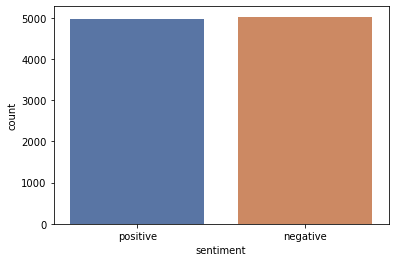

In [125]:
sns.countplot(x = 'sentiment', data = df, palette = 'deep')

We can see that the data is balanced in terms of number of Negative reviews vs Postive reviews

Word Cloud

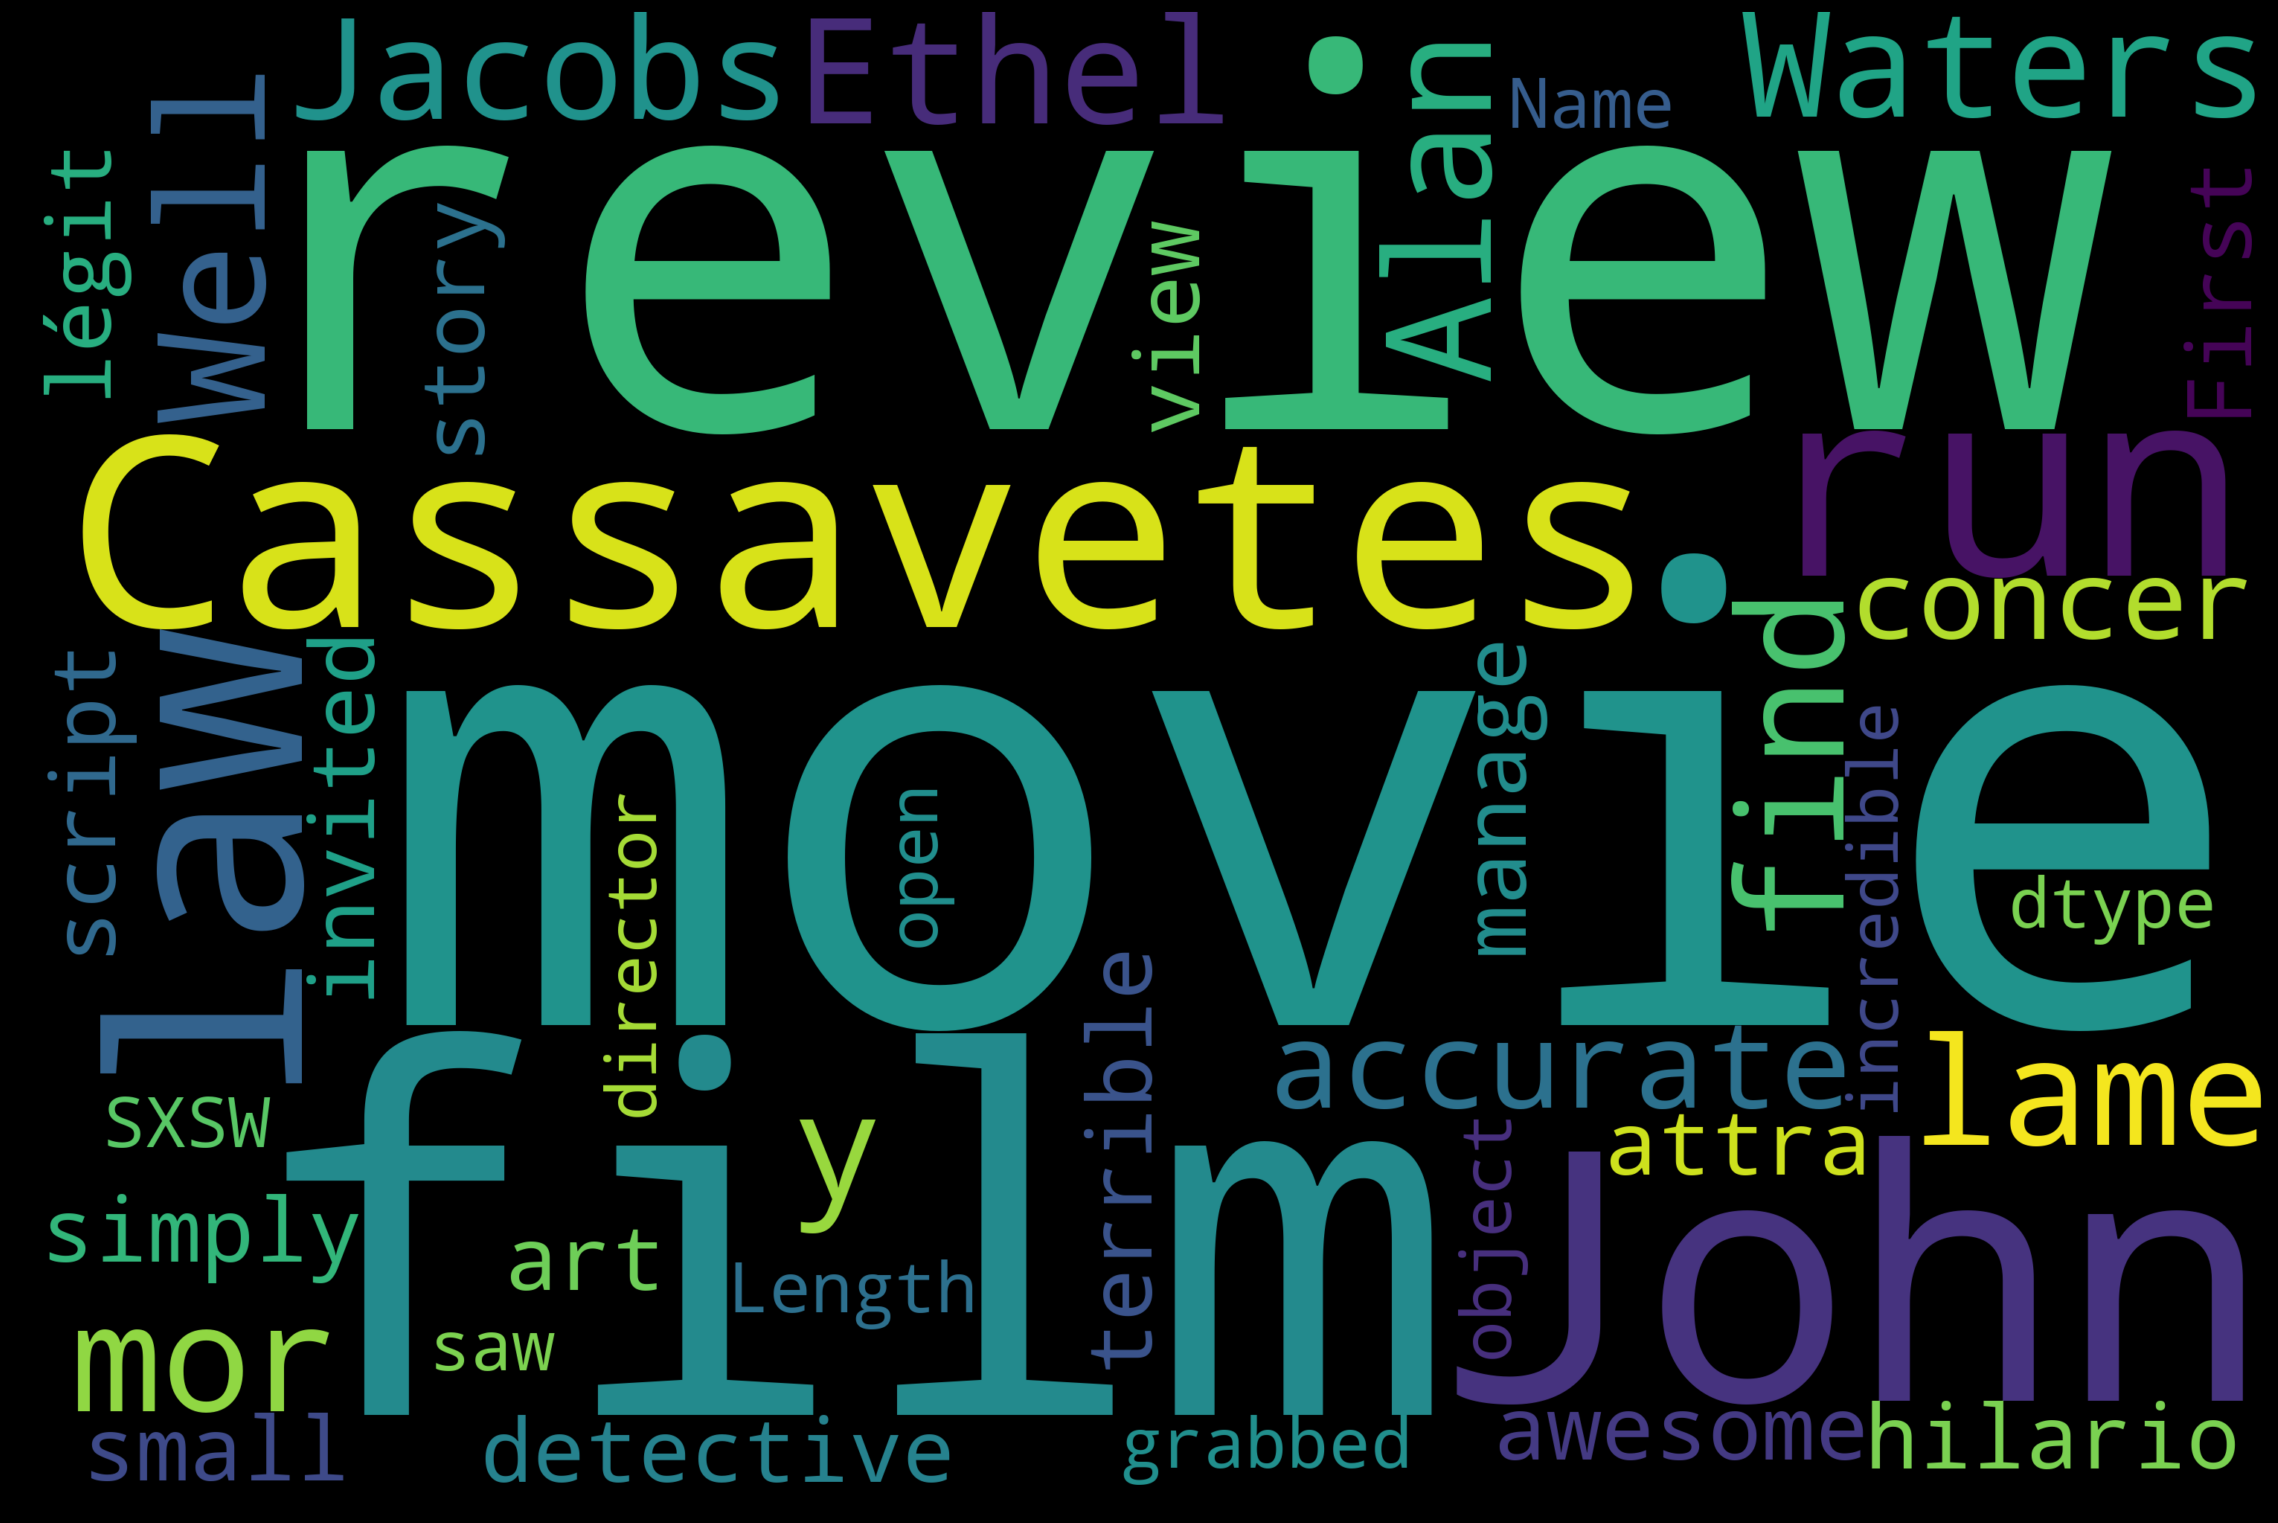

In [126]:
text = df["review"]

wordcloud = wc.WordCloud(
    width = 3000,
    height = 2000,
    stopwords = wc.STOPWORDS).generate(str(text))

fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')

Obviously, there are some HTML Tags in "Reviews" Column that can skew the model performance. So, we need to handle them.

### Removing HTML Tags

BeautifulSoup is a Python library for pulling data out of HTML and XML files. So, we will use it here to extract HTML Tags from "Reviews"

See Documentation here: https://www.crummy.com/software/BeautifulSoup/bs4/doc/

In [127]:
df['review'] = df['review'].apply(lambda review : BeautifulSoup(review, "lxml").text)

df['review']

0       John Cassavetes is on the run from the law. He...
1       It's not just that the movie is lame. It's mor...
2       Well, if it weren't for Ethel Waters and a 7-y...
3       I find Alan Jacobs review very accurate concer...
4       This movie is simply awesome. It is so hilario...
                              ...                        
9995    How did such a terrible script manage to attra...
9996    I was invited to view this film at a small art...
9997    First of all,there is a detective story:"légit...
9998    This movie grabbed me with the incredible open...
9999    I saw this film at SXSW with the director in a...
Name: review, Length: 9982, dtype: object

### Lowercase Conversion and Removing Digits

In [128]:
df['review'] = df['review'].apply(lambda review : re.sub(r"[0-9]", " ", review.lower()))
df['review']

0       john cassavetes is on the run from the law. he...
1       it's not just that the movie is lame. it's mor...
2       well, if it weren't for ethel waters and a  -y...
3       i find alan jacobs review very accurate concer...
4       this movie is simply awesome. it is so hilario...
                              ...                        
9995    how did such a terrible script manage to attra...
9996    i was invited to view this film at a small art...
9997    first of all,there is a detective story:"légit...
9998    this movie grabbed me with the incredible open...
9999    i saw this film at sxsw with the director in a...
Name: review, Length: 9982, dtype: object

### Tokenization

Tokenization refers to splitting text into smaller units called tokens (like words, numbers, etc)

The Treebank tokenizer is useful where it separates phrase-terminating punctuation from adjacent tokens. For example," don't " is tokenized as [ "do", "n't" ]

See documentation: https://www.nltk.org/_modules/nltk/tokenize/treebank.html

In [129]:
tokenizer = TreebankWordTokenizer()

df['review'] = df['review'].apply(lambda review: tokenizer.tokenize(review))
df['review']

0       [john, cassavetes, is, on, the, run, from, the...
1       [it, 's, not, just, that, the, movie, is, lame...
2       [well, ,, if, it, were, n't, for, ethel, water...
3       [i, find, alan, jacobs, review, very, accurate...
4       [this, movie, is, simply, awesome., it, is, so...
                              ...                        
9995    [how, did, such, a, terrible, script, manage, ...
9996    [i, was, invited, to, view, this, film, at, a,...
9997    [first, of, all, ,, there, is, a, detective, s...
9998    [this, movie, grabbed, me, with, the, incredib...
9999    [i, saw, this, film, at, sxsw, with, the, dire...
Name: review, Length: 9982, dtype: object

### Removing Stopwords

Removing words that do not contribute to meaning.

One of main Challenges of removing stopwords is handling Negation

In [130]:
nltk.download('stopwords')
  
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tameem.alghazaly\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [131]:
negation_list = ["no","nor", "not", "n't"]

stop_words = [word for word in stop_words if word not in negation_list]
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [132]:
# Removing stopwords from "Review" Column

df['review'] = df['review'].apply(lambda review: [word for word in review if word not in stop_words])
df['review']

0       [john, cassavetes, run, law., bottom, heap., s...
1       ['s, not, movie, lame., 's, that., movie, unne...
2       [well, ,, n't, ethel, waters, -year-old, sammy...
3       [find, alan, jacobs, review, accurate, concern...
4       [movie, simply, awesome., hilarious., although...
                              ...                        
9995    [terrible, script, manage, attract, cast, ?, r...
9996    [invited, view, film, small, art, museum, scre...
9997    [first, ,, detective, story, :, '', légitime, ...
9998    [movie, grabbed, incredible, opening, sequence...
9999    [saw, film, sxsw, director, attendance., quite...
Name: review, Length: 9982, dtype: object

In [133]:
# removing punctuation, stripping away any trailing dots and dashes, and removing empty strings

df['review'] = df['review'].apply(lambda review : list(filter(None,[word.strip(".").strip('_') for word in review if word not in string.punctuation])))

df['review']

0       [john, cassavetes, run, law, bottom, heap, see...
1       ['s, not, movie, lame, 's, that, movie, unnece...
2       [well, n't, ethel, waters, -year-old, sammy, d...
3       [find, alan, jacobs, review, accurate, concern...
4       [movie, simply, awesome, hilarious, although, ...
                              ...                        
9995    [terrible, script, manage, attract, cast, ridi...
9996    [invited, view, film, small, art, museum, scre...
9997    [first, detective, story, '', légitime, défens...
9998    [movie, grabbed, incredible, opening, sequence...
9999    [saw, film, sxsw, director, attendance, quite,...
Name: review, Length: 9982, dtype: object

### Lemmatization

In [134]:
# Download the needed wordnets, which links words into semantic relations including synonyms, hyponyms, and meronyms
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

df['review'] = df['review'].apply(lambda review: [lemmatizer.lemmatize(word) for word in review])
df['review']

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tameem.alghazaly\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\tameem.alghazaly\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0       [john, cassavetes, run, law, bottom, heap, see...
1       ['s, not, movie, lame, 's, that, movie, unnece...
2       [well, n't, ethel, water, -year-old, sammy, da...
3       [find, alan, jacob, review, accurate, concerni...
4       [movie, simply, awesome, hilarious, although, ...
                              ...                        
9995    [terrible, script, manage, attract, cast, ridi...
9996    [invited, view, film, small, art, museum, scre...
9997    [first, detective, story, '', légitime, défens...
9998    [movie, grabbed, incredible, opening, sequence...
9999    [saw, film, sxsw, director, attendance, quite,...
Name: review, Length: 9982, dtype: object

## Data Preparation for Modelling
### Label Encoding

Label Encoding for "Sentiment" feature is used since the categories are ordinal.


Note: Label Encoding assigns labels to categories based on their lexicographical order.

So, it will automatically label "negative" as 0 and "positive" as 1

In [135]:
df['sentiment'] = df['sentiment'].astype('category').cat.codes

df['sentiment']

0       1
1       0
2       0
3       1
4       1
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: sentiment, Length: 9982, dtype: int8

## Modelling

In [136]:
df['review']= df['review'].apply(lambda x : " ".join(x))
df["review"]

0       john cassavetes run law bottom heap see negro ...
1       's not movie lame 's that movie unnecessary ne...
2       well n't ethel water -year-old sammy davis jr ...
3       find alan jacob review accurate concerning mov...
4       movie simply awesome hilarious although skatin...
                              ...                        
9995    terrible script manage attract cast ridiculous...
9996    invited view film small art museum screening n...
9997    first detective story '' légitime défense '' b...
9998    movie grabbed incredible opening sequence tric...
9999    saw film sxsw director attendance quite people...
Name: review, Length: 9982, dtype: object

### Splitting Data into Training and Testing

In [137]:
from sklearn.model_selection import train_test_split

X = df['review'] #Independent Variable
y = df['sentiment'] #Dependent Variable

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Checking the Frequency of words in different Sentiments

In [138]:
good = x_train[y_train[y_train == 1].index]

bad = x_train[y_train[y_train == 0].index]

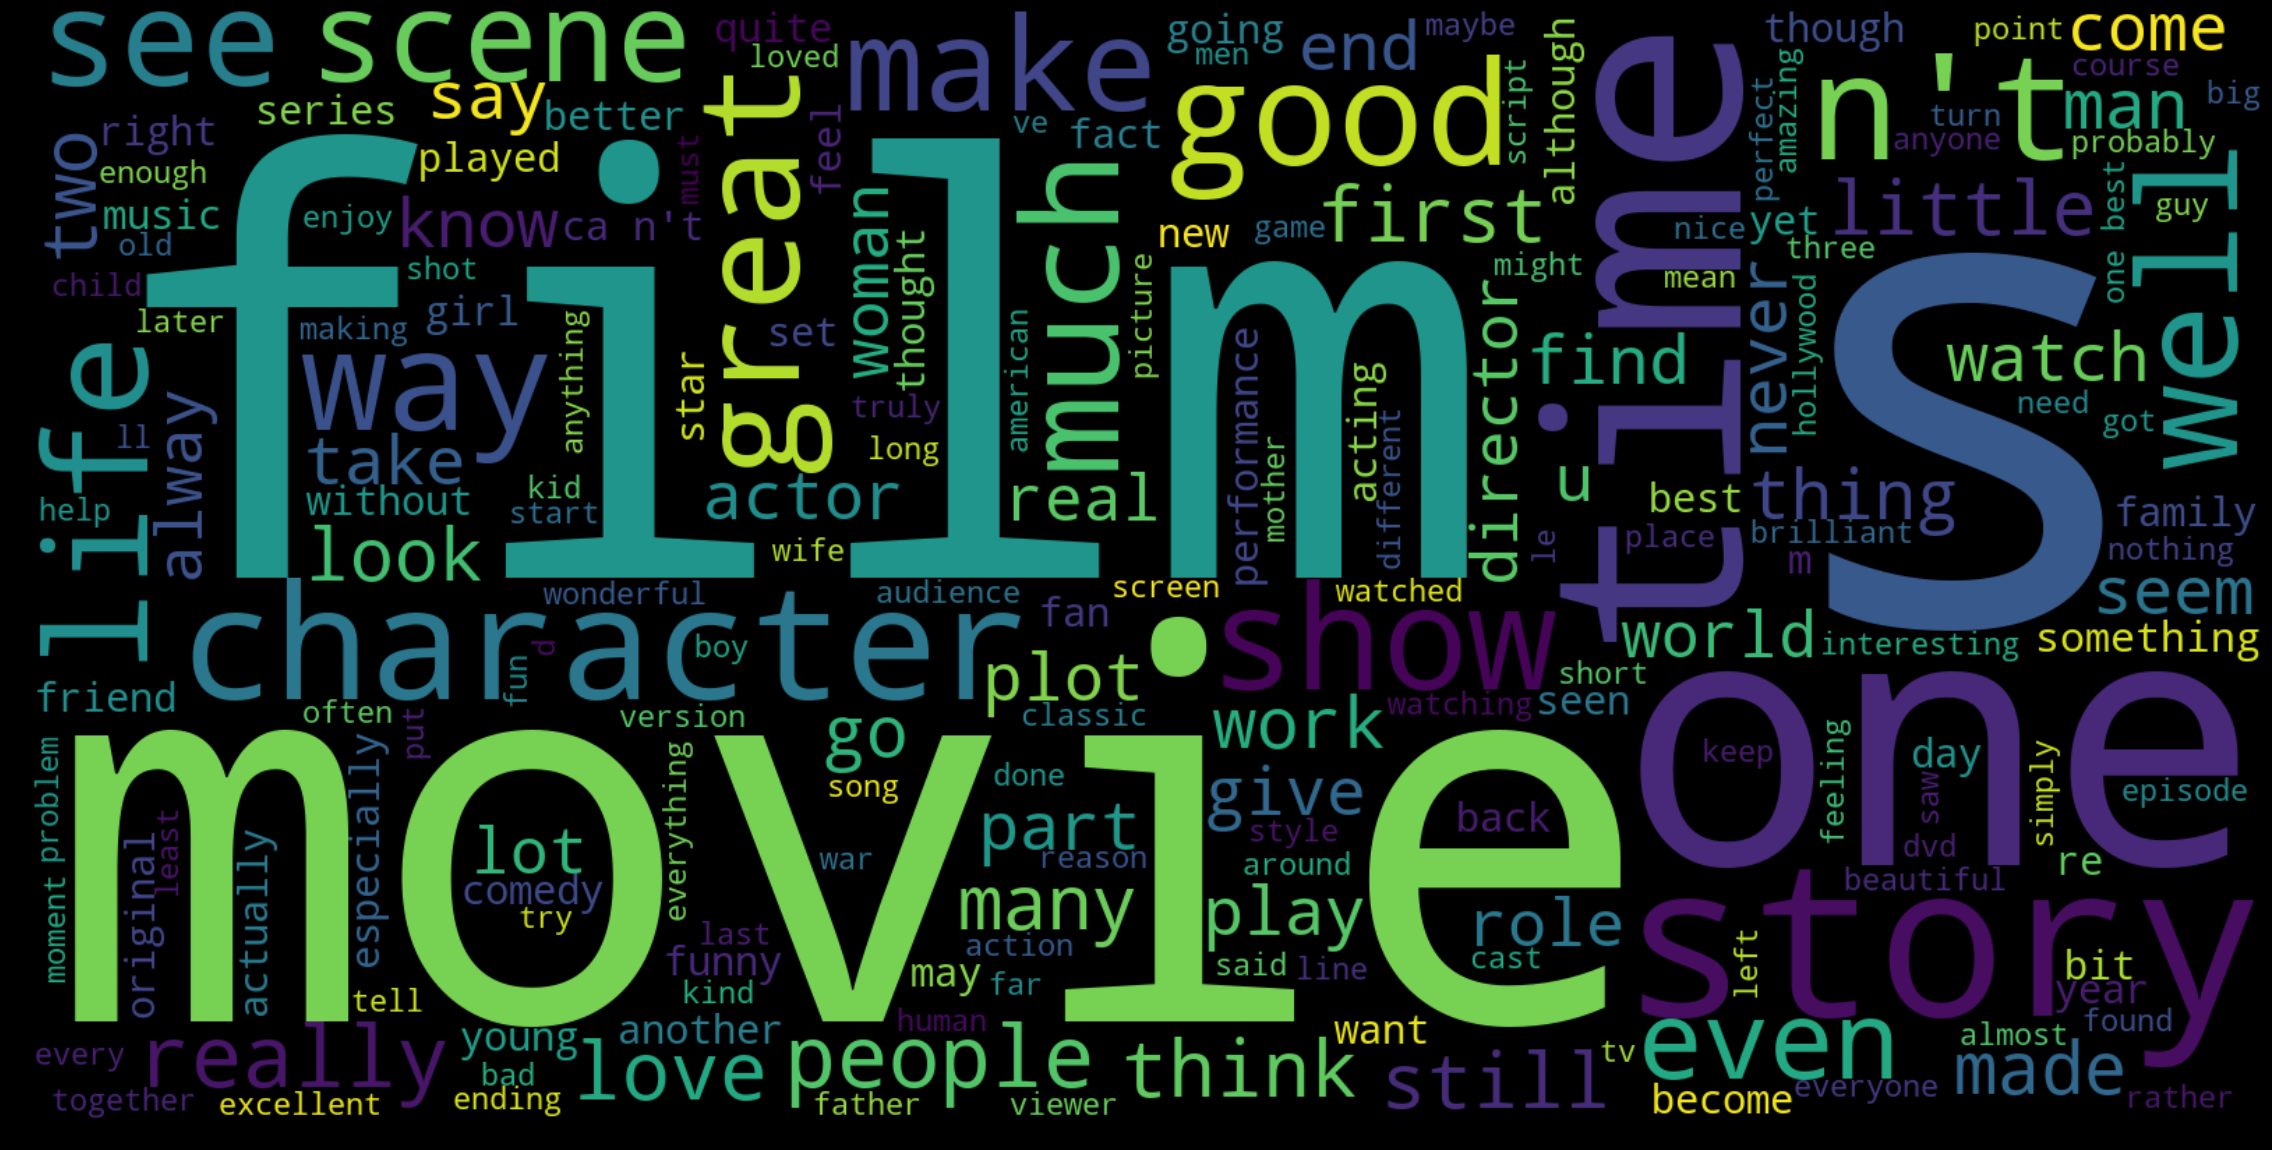

In [139]:
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')

good_reviews = wc.WordCloud(min_font_size = 3 , width = 1600 , height = 800).generate(" ".join(good))

plt.imshow(good_reviews,interpolation = 'bilinear')

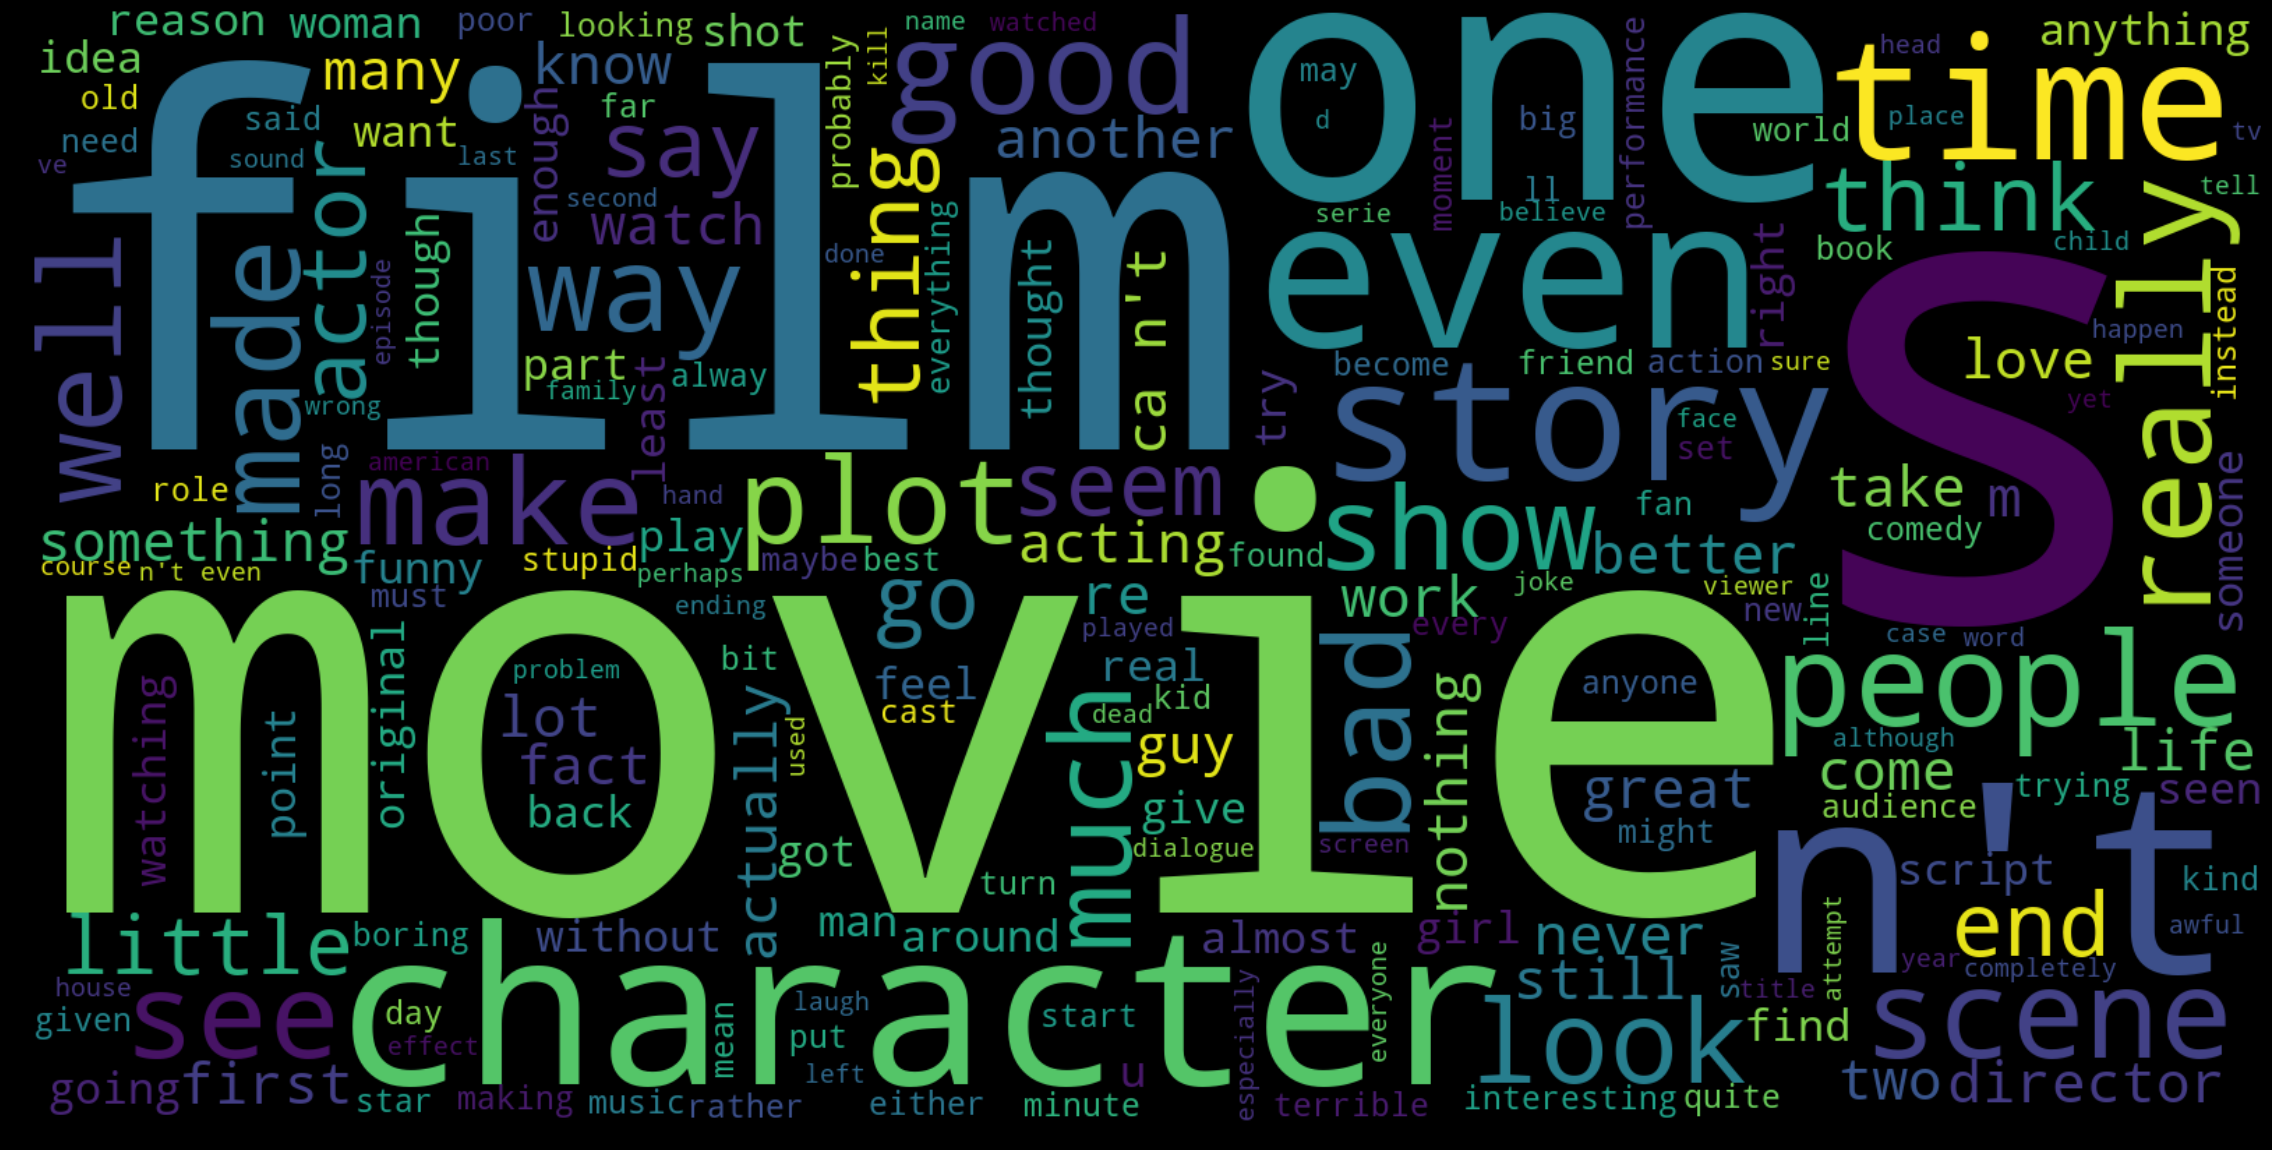

In [140]:

fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')

negative_reviews = wc.WordCloud(min_font_size = 3 , width = 1600 , height = 800).generate(" ".join(bad))

plt.imshow(negative_reviews,interpolation = 'bilinear')

### Bag of Words

In [141]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(max_features= 15000, ngram_range=(1,2))

cv_train_reviews = count_vect.fit_transform(x_train) #transformed train reviews

cv_test_reviews = count_vect.transform(x_test) #transformed test reviews

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (6987, 15000)
BOW_cv_test: (2995, 15000)


### Naive Bayes Classifier

In [142]:
from sklearn.naive_bayes import MultinomialNB

mn_model = MultinomialNB()

In [143]:
mn_model.fit(cv_train_reviews, y_train)

MultinomialNB()

### Random Forest Classifier

In [144]:
from sklearn.ensemble import RandomForestClassifier

random_forest_clf = RandomForestClassifier(random_state=42)

In [145]:
random_forest_clf.fit(cv_train_reviews, y_train)

RandomForestClassifier(random_state=42)

## Evaluation

### Naive Bayes Evaluation

In [146]:
y_pred = mn_model.predict(cv_test_reviews)

In [147]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1488
           1       0.86      0.84      0.85      1507

    accuracy                           0.85      2995
   macro avg       0.85      0.85      0.85      2995
weighted avg       0.85      0.85      0.85      2995



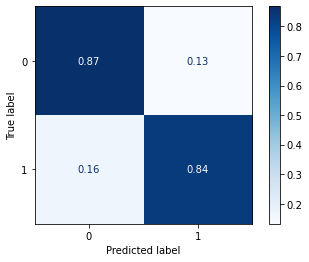

In [148]:

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(mn_model, cv_test_reviews, y_test, cmap='Blues', normalize='true')

In [149]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average='weighted')

0.8513919959169685

### Random Forest Evaluation

In [150]:
rf_y_pred = random_forest_clf.predict(cv_test_reviews)

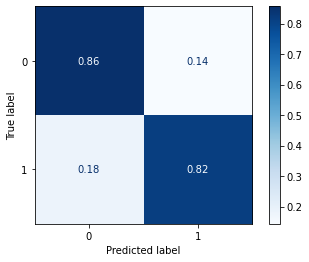

In [151]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(random_forest_clf, cv_test_reviews, y_test, cmap='Blues', normalize='true')


In [152]:
from sklearn.metrics import f1_score

f1_score(y_test, rf_y_pred, average='weighted')

0.8360094270076647